# **Ch07.군집화 실습 #1**

**Ch06-01.KMeans 실습**

**1. K-평균을 이용한 붓꽃 데이터 세트 군집화**

  - 붓꽃의 꽃받침, 꽃잎 길이에 따라 군집화가 어떻게 결정되는지 확인해보고, 이를 분류 값과 비교 분석

**2. 사이킷런 make_blobs( )를 이용한 데이터 생성**

  - 군집화 알고리즘 테스트를 위한 데이터 생성 후 KMeans 수행

## K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# 3개 그룹으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [3]:
# 각 데이터가 어떤 중심에 속하는지 확인
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [5]:
# 위의 레이블이 실제 레이블과 얼마나 차이가 나는지 확인
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count() # 개수만 보려고 임의의 칼럼만 추가한것임
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


* Target 0인 데이터는 1번 군집으로 모두 잘 그룹핑됨.
* Target 1인 데이터는 2개만 2번 군집으로 그룹핑됨.
* Target 2인 데이터는 0번, 2번 군집에 분산돼 그룹핑됨.

In [6]:
# 군집화 결과 2차원 평면상에 시각화
# iris 속성이 4개이므로 PCA로 2개로 차원축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


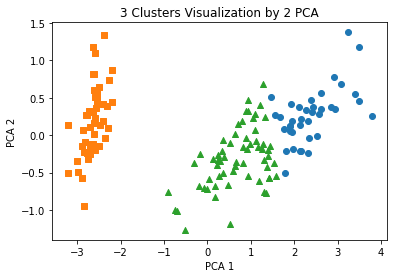

In [7]:
# cluster 0 : 마커 'o'
# cluster 1 : 마커 's'
# cluster 2 : 마커 '^'

# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 라벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA')
plt.show()


## 사이킷런 make_blobs( )를 이용한 데이터 생성

In [78]:
# Clustering 알고리즘 테스트를 위한 데이터 생성
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True) # 어떤 종류가, 몇 개 있는가
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [79]:
# 데이터 가공을 편리하게 하기 위해 위 데이터 셋을 DataFrame으로 변경
# 피처 이름은 ftr1, ftr2
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


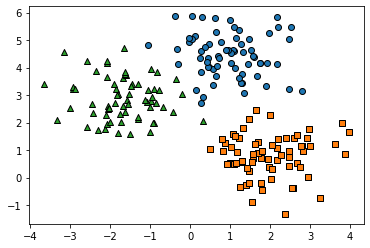

In [80]:
# make_blob으로 만든 피처 데이터 셋의 군집화 분포 확인

target_list = np.unique(y) # [0,1,2]

# target값에 따라 마커를 다르게 표시
markers = ['o', 's', '^']

# target값 0, 1, 2로 marker 별로 표시
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target]) # edgecolor는 marker의 테두리 설정
  
plt.show()

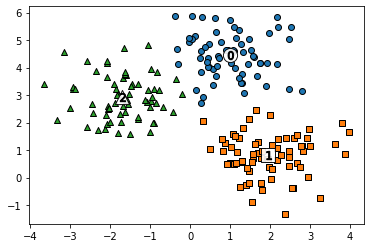

In [81]:
# 이 데이터 셋에 KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_ # shape : [군집개수, 피처개수]
unique_labels = np.unique(cluster_labels) # centroid 레이블
markers = ['o', 's', '^']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label] # centroid label과 같으면 소속결정
  center_x_y = centers[label] 
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$'%label)

plt.show()

In [18]:
# 타겟과 군집화 결과 매핑
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


**cluster_std 파라미터 변화에 따른 데이터 분포도**

In [82]:
def visualize_std(std_lists):
  n_cols = len(std_lists)
  fig, axs = plt.subplots(figsize=(6*n_cols, 4), nrows=1, ncols=n_cols)
  for ind, std in enumerate(std_lists):
    X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std= std, random_state=0)
    clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
    clusterDF['target'] = y
    target_list = np.unique(y)
    markers = ['o', 's', '^']
    for target in target_list:
      target_cluster = clusterDF[clusterDF['target']==target]
      axs[ind].scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
    axs[ind].set_title('Standard Deviation:'+str(std))

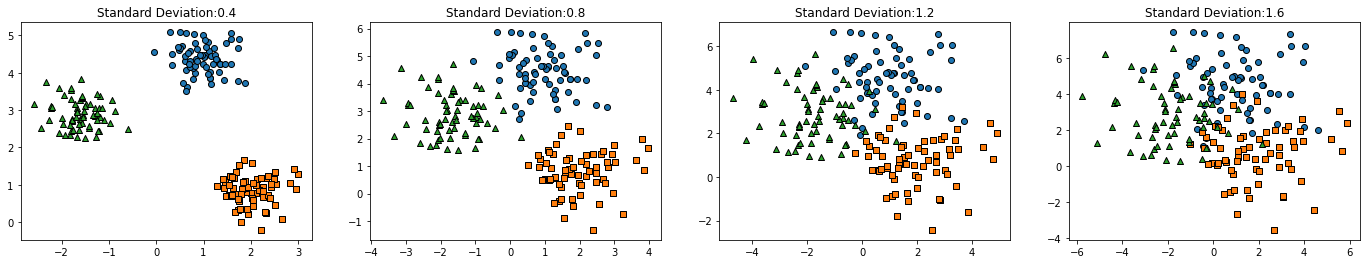

In [83]:
visualize_std([0.4, 0.8, 1.2, 1.6])